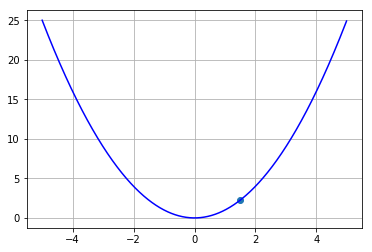

In [27]:
"""Unit-testing Gradient Descent
Zoom in on cost function, until it becomes linear, 
move in each direction of the line 
with a distance of epsilon.
"""
a = np.arange(-5,5,0.01)
plot(a, a**2, 'b')
grid(1)
scatter(1.5, 1.5 ** 2)

In [16]:
%pylab inline
#Import Code from previous videos:
from partFour import *

Populating the interactive namespace from numpy and matplotlib


In [17]:
# compute the slope of x^2
def f(x):
    return x**2

In [18]:
epsilon = 1e-4
x = 1.5

In [19]:
numericalGradient = (f(x+epsilon)- f(x-epsilon))/(2*epsilon)

In [20]:
numericalGradient, 2*x

(2.9999999999996696, 3.0)

In [21]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    
    #Helper Functions for interacting with other classes:    
    #Unrolling weights into vectors so as to use them later in BFGS optimization
    def getParams(self):
        #ravel -> return a contiguous flattened array.   
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    #Go back from the vector representations to matrices to use them later in cost function, forward and backpropagation
    def setParams(self, params):
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    #Unrolling gradients into vectors so as to compare them later with numerical gradients   
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [22]:
def computeNumericalGradient(N, X, y):
        #get vectorized params
        paramsInitial = N.getParams()
        #(num)grads have the same size with params
        numgrad = np.zeros(paramsInitial.shape)
        #perturb stands for the epsilon added and substracted in grads 
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero
            perturb[p] = 0
            
        #Return Params to original value
        N.setParams(paramsInitial)

        return numgrad

In [23]:
NN = Neural_Network()

In [24]:
numgrad = computeNumericalGradient(NN, X, y)
numgrad

array([-0.02700366,  0.06570361, -0.02946249, -0.01864693,  0.04214146,
       -0.0189394 , -0.16494952, -0.12579254, -0.04809677])

In [25]:
grad = NN.computeGradients(X,y)
grad

array([-0.02700366,  0.06570361, -0.02946249, -0.01864693,  0.04214146,
       -0.0189394 , -0.16494952, -0.12579254, -0.04809677])

In [26]:
#Numerator is the norm of the difference and Denominator is the norm sum
#Results should be on the order of 10^-8 or less
norm(grad-numgrad)/norm(grad+numgrad)

1.6764022538465744e-10